In [29]:
from skimage import color, io, util, filters
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale
import scipy.fftpack as fp

import helper

1.a Tampilkan citra pada domain frekuensi!

(-0.5, 385.5, 360.5, -0.5)

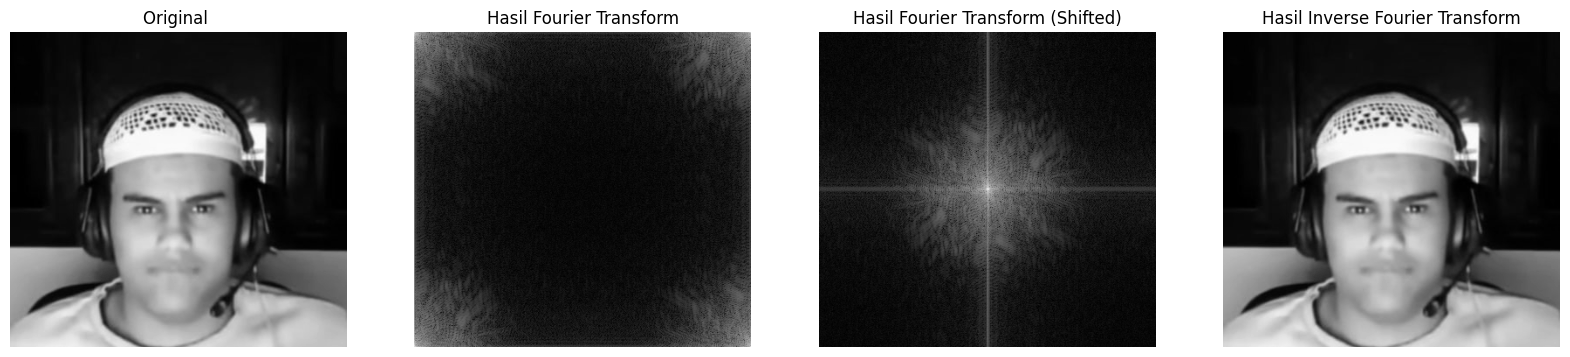

In [30]:

image = color.rgb2gray(io.imread('fanum_look_alike.jpg'))

fourierTransform = fp.fft2(image)
fourierTransformNorm = abs(fourierTransform)
fourierTransformScale = np.log(1+fourierTransformNorm)

fourierTransformShift = fp.fftshift(fourierTransformScale)
inverseFourierTransform = fp.ifft2(fourierTransform).real

plt.figure(figsize=(20,7))
plt.subplot(1, 4, 1); plt.imshow(image, cmap ='gray') 
plt.title('Original '); plt.axis('off' )
plt.subplot(1 , 4 , 2); plt.imshow(fourierTransformScale, cmap ='gray') 
plt.title('Hasil Fourier Transform' ) ; plt.axis('off')
plt.subplot(1 , 4 , 3); plt.imshow(fourierTransformShift, cmap ='gray') 
plt.title('Hasil Fourier Transform (Shifted)' ) ; plt.axis('off')
plt.subplot(1 , 4 , 4); plt.imshow(inverseFourierTransform, cmap ='gray') 
plt.title('Hasil Inverse Fourier Transform' ) ; plt.axis('off')

1.b Tampilkan citra pada domain spasial dan frekuensi dari citra hasil penerapan Low Pass Filter dan jelaskan perbedaannya!

(-0.5, 771.5, 721.5, -0.5)

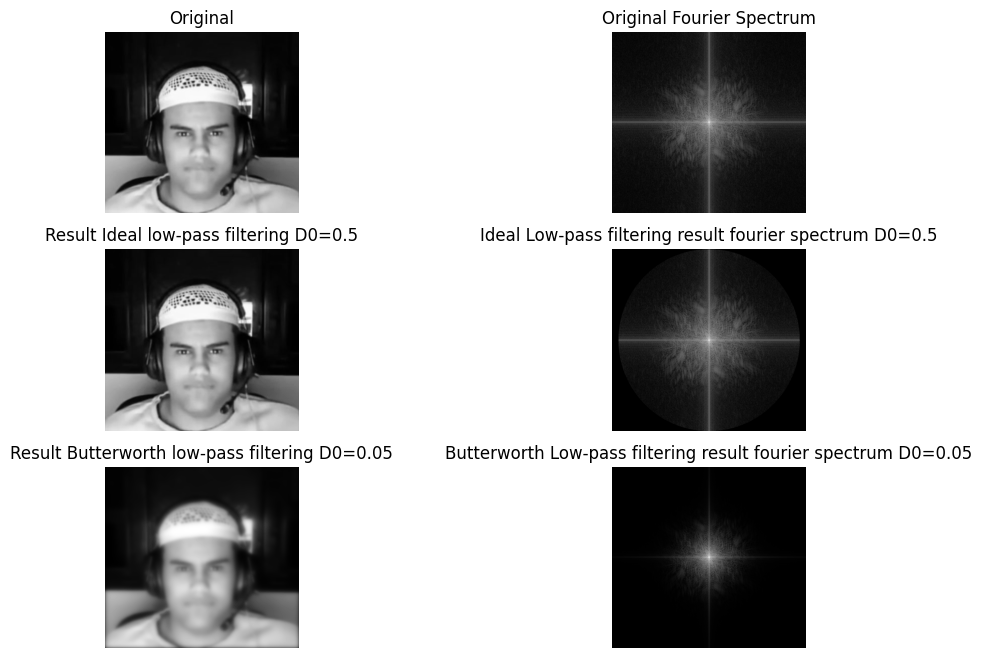

In [31]:
w, l = helper.paddedsize(image.shape[0], image.shape[1])

h1 = helper.lpfilter('ideal', w, l, 0.5 * w)
h2 = helper.lpfilter('btw', w, l, 0.05 * w)
f = fp.fft2(image, (w,l))

LPFSImage15 = h1*f
LPFSImage7 = h2*f

LPFImage1 = fp.ifft2(LPFSImage15).real
LPFImage1 = LPFImage1[:image.shape[0], :image.shape[1]]

LPFImage2 = fp.ifft2(LPFSImage7).real
LPFImage2 = LPFImage2[:image.shape[0], :image.shape[1]]

fc = fp.fftshift(f)
fcf = fp.fftshift(LPFSImage15)
fcf7 = fp.fftshift(LPFSImage7)

s1 = np.log(1+abs(fc))
s2 = np.log(1+abs(fcf))
s3 = np.log(1+abs(fcf7))

plt.figure(figsize=(12,8))
plt.subplot(3,2,1); plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(3,2,2); plt.imshow(s1, cmap='gray')
plt.title('Original Fourier Spectrum')
plt.axis('off')

plt.subplot(3,2,3); plt.imshow(LPFImage1, cmap='gray')
plt.title('Result Ideal low-pass filtering D0=0.5')
plt.axis('off')
plt.subplot(3,2,4); plt.imshow(s2, cmap='gray')
plt.title('Ideal Low-pass filtering result fourier spectrum D0=0.5')
plt.axis('off')

plt.subplot(3,2,5); plt.imshow(LPFImage2, cmap='gray')
plt.title('Result Butterworth low-pass filtering D0=0.05')
plt.axis('off')
plt.subplot(3,2,6); plt.imshow(s3, cmap='gray')
plt.title('Butterworth Low-pass filtering result fourier spectrum D0=0.05')
plt.axis('off')

Domain Spasial: Dari visualisasi yang sudah disediakan di atas kita dapat melihat perbedaan yang cukup jelas ketika kita memberikan perbedaan nilai D0 pada low-pass filter. Untuk low-pass filter yang memiliki nilai D0 lebih besar (nilai D0 = 0,5) maka kualitas gambar yang dihasilkan akan lebih jelas dan tidak mengandung banyak unsur blur. Sedangkan gambar dengan nilai D0=0,05 (nilai D0 yang lebih kecil) memiliki banyak sekali blur yang sampai membuat gambar tidak terlihat terlalu jelas.

Domain Frekuensi: Dari visualisasi di atas terlihat bahwa low-pass filter yang memiliki nilai D0 lebih besar (D0 = 0,5) terdapat batas berbentuk lingkaran yang cukup besar sehingga jumlah frekuensi tinggi yang ditangkap juga cukup banyak, sedangkan jika untuk nilai D0 yang lebih kecil (D0 = 0,05) terlihat bahwa jumlah frekuensi tinggi yang ditangkap menjadi jauh lebih kecil. Oleh karena itu dapat dikatakan bahwa nilai D0 akan menjadi faktor penentu seberapa banyak frekuensi tinggi tersebut dapat ditangkap.

1.c Tampilkan citra pada domain spasial dan frekuensi dari citra hasil penerapan High Pass Filter dan jelaskan perbedaannya!

(-0.5, 771.5, 721.5, -0.5)

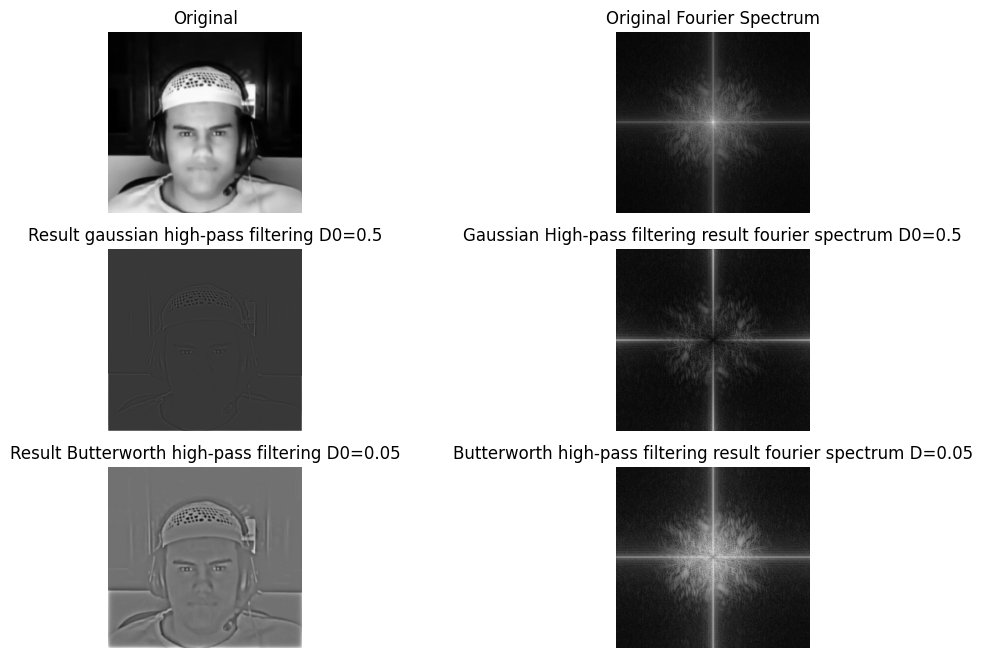

In [32]:
w, l = helper.paddedsize(image.shape[0], image.shape[1])

h3 = helper.hpfilter('gaussian', w, l, 0.5 * w)
h4 = helper.hpfilter('btw', w, l, 0.05 * w)
f = fp.fft2(image, (w,l))

LPFSImage15 = h3*f
LPFSImage7 = h4*f

LPFImage1 = fp.ifft2(LPFSImage15).real
LPFImage1 = LPFImage1[:image.shape[0], :image.shape[1]]

LPFImage2 = fp.ifft2(LPFSImage7).real
LPFImage2 = LPFImage2[:image.shape[0], :image.shape[1]]

fc = fp.fftshift(f)
fcf = fp.fftshift(LPFSImage15)
fcf7 = fp.fftshift(LPFSImage7)

s1 = np.log(1+abs(fc))
s2 = np.log(1+abs(fcf))
s3 = np.log(1+abs(fcf7))

plt.figure(figsize=(12,8))
plt.subplot(3,2,1); plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(3,2,2); plt.imshow(s1, cmap='gray')
plt.title('Original Fourier Spectrum')
plt.axis('off')

plt.subplot(3,2,3); plt.imshow(LPFImage1, cmap='gray')
plt.title('Result gaussian high-pass filtering D0=0.5')
plt.axis('off')
plt.subplot(3,2,4); plt.imshow(s2, cmap='gray')
plt.title('Gaussian High-pass filtering result fourier spectrum D0=0.5')
plt.axis('off')

plt.subplot(3,2,5); plt.imshow(LPFImage2, cmap='gray')
plt.title('Result Butterworth high-pass filtering D0=0.05')
plt.axis('off')
plt.subplot(3,2,6); plt.imshow(s3, cmap='gray')
plt.title('Butterworth high-pass filtering result fourier spectrum D=0.05')
plt.axis('off')

Domain Spasial: Dari visualisasi di atas terlihat bahwa dengan nilai D0 yang lebih besar (D0 = 0,5) gambar yang dihasilkan cenderung berwarna gelap dan hanya menyisakan sedikit unsur terang yang masih membiarkan edge pada isi gambar terlihat walaupun tidak terlalu jelas, sedangkan untuk nilai D0 yang lebih kecil (D0 = 0.05) gambar yang dihasilkan lebih terlihat jelas dimana perpaduan terang dan gelap masih terlihat lumayan jelas sehingga gambar masih dapat dikenali.

Domain Frekuensi: Dari visualisasi di atas terlihat bahwa dengan nilai D0 yang lebih besar (D0 = 0,5) dapat menangkap jumlah frekuensi tinggi yang lebih sedikit, sedangkan nilai D0 yang lebih kecil (D0 = 0,05) dapat menangkap jumlah frekuensi tinggi yang lebih banyak. Pada kasus ini, kebalikan dari low pass filtering, maka nilai D0 akan menjadi faktor penentu seberapa banyak frekuensi tinggi yang tidak ditangkap.

1.d Lakukan analisis dan berikan kesimpulan dari nilai D0 yang digunakan pada bagian (b) dan (c)!

Nilai D0 menjadi batas frekuensi mana yang akan diambil dan mana yang tidak diambil. Pada high-pass filtering frekuensi yang diambil adalah frekuensi yang lebih tinggi dari pada nilai D0 tersebut, sedangkan pada low-pass filtering frekuensi yang diambil adalah frekuensi yang lebih rendah dari pada nilai D0 tersebut.

2.a Tampilkan citra tersebut pada domain frekuensi!

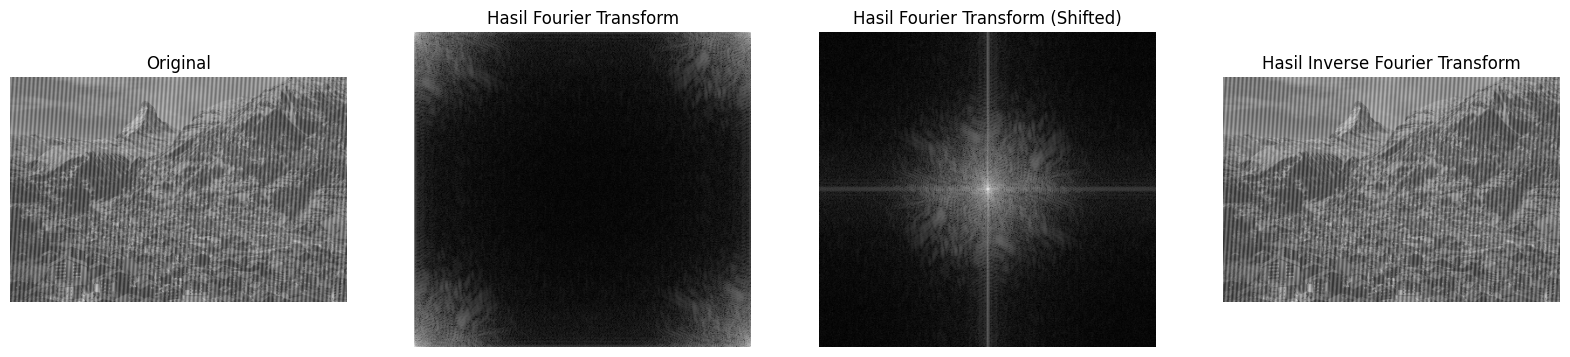

In [33]:
swissImage = color.rgb2gray(io.imread('swiss.jpg'))

swisssFourierTransform = fp.fft2(swissImage)
swissFourierTransformNorm = abs(fourierTransform)
swissFourierTransformScale = np.log(1+fourierTransformNorm)
swissFourierTransformShift = fp.fftshift(swissFourierTransformScale)
inverseSwissFourierTransform = fp.ifft2(swisssFourierTransform).real

plt.figure(figsize=(20,7))
plt.subplot(1, 4, 1); plt.imshow(swissImage, cmap ='gray') 
plt.title('Original'); plt.axis('off')
plt.subplot(1 , 4 , 2); plt.imshow(fourierTransformScale, cmap ='gray') 
plt.title('Hasil Fourier Transform' ); plt.axis('off')
plt.subplot(1 , 4 , 3); plt.imshow(swissFourierTransformShift, cmap ='gray') 
plt.title('Hasil Fourier Transform (Shifted)' ); plt.axis('off')
plt.subplot(1 , 4 , 4); plt.imshow(inverseSwissFourierTransform, cmap ='gray') 
plt.title('Hasil Inverse Fourier Transform' ); plt.axis('off')
    
plt.show()

2.b Lakukan filtering yang tepat untuk mereduksi noise yang ada dan jelaskan mengapa anda memilih melakukan filtering tersebut!

Text(0.5, 1.0, 'Fourier Spectrum of Noisy Image ')

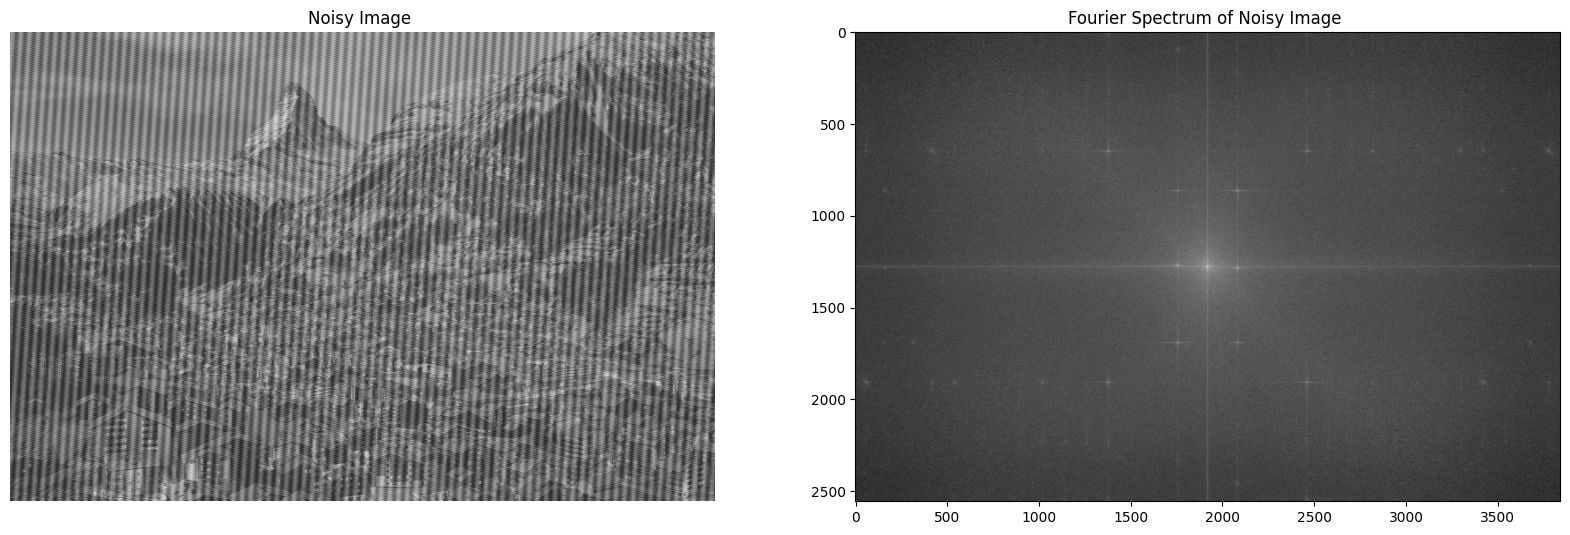

In [34]:
# Operasi filtering
w2, l2 = helper.paddedsize(swissImage.shape[0], swissImage.shape[1])
f2 = fp.fft2(util.img_as_float(swissImage), (w2,l2))
fc2 = fp.fftshift(f2)
s1Akhir = np.log(1+abs(fc2))

noises = [[170, 10], [-165, -10], [170, 410], [-165, 410], [170, -420], [-156, -420], [540, 635], [540, -635], [-540, -635], [-540, 635]]

FSImage2 = f2
for noise in noises :
    FSImage2 *= helper.notch('gaussian', w2, l2, 20, noise[0], noise[1])
    
FImage2 = fp.ifft2(FSImage2).real
FImage2 = FImage2[:swissImage.shape[0], :swissImage.shape[1]]

fcf2 = fp.fftshift(FSImage2)
s2Akhir = np.log(1+abs(fcf2))

# Menunjukkan grafik image yang masih penuh dengan noise
plt.figure ( figsize =(20 , 15) )
plt.subplot (1 ,2 ,1) ; plt . imshow ( swissImage , cmap ='gray')
plt.title ('Noisy Image ') ; plt . axis ("off")
plt. subplot (1 ,2 ,2) ; plt . imshow ( s1Akhir , cmap ='gray')
plt. title ('Fourier Spectrum of Noisy Image ')

Filtering yang akan digunakan di atas adalah notch filtering. Hal tersebut dikarenakan kita ingin menghilangkan noise-noise yang tidak diinginkan yang berpotensi untuk menghalangi sinyal yang ingin diterima dari gambar. Jika kita lihat pada hasil visualisasi fourier spectrum sebelum dilakukan filtering di atas, maka kita dapat melihat bahwa ada beberapa noise berupa titik putih yang cukup dominan. Titik tersebutlah yang ingin kita hilangkan agar kualitas gambar yang didapatkan bisa meningkat.

2.c Tampilkan perbandingan citra sebelum dan sesudah filtering pada domain spasial dan frekuensi serta ceritakan hasilnya!

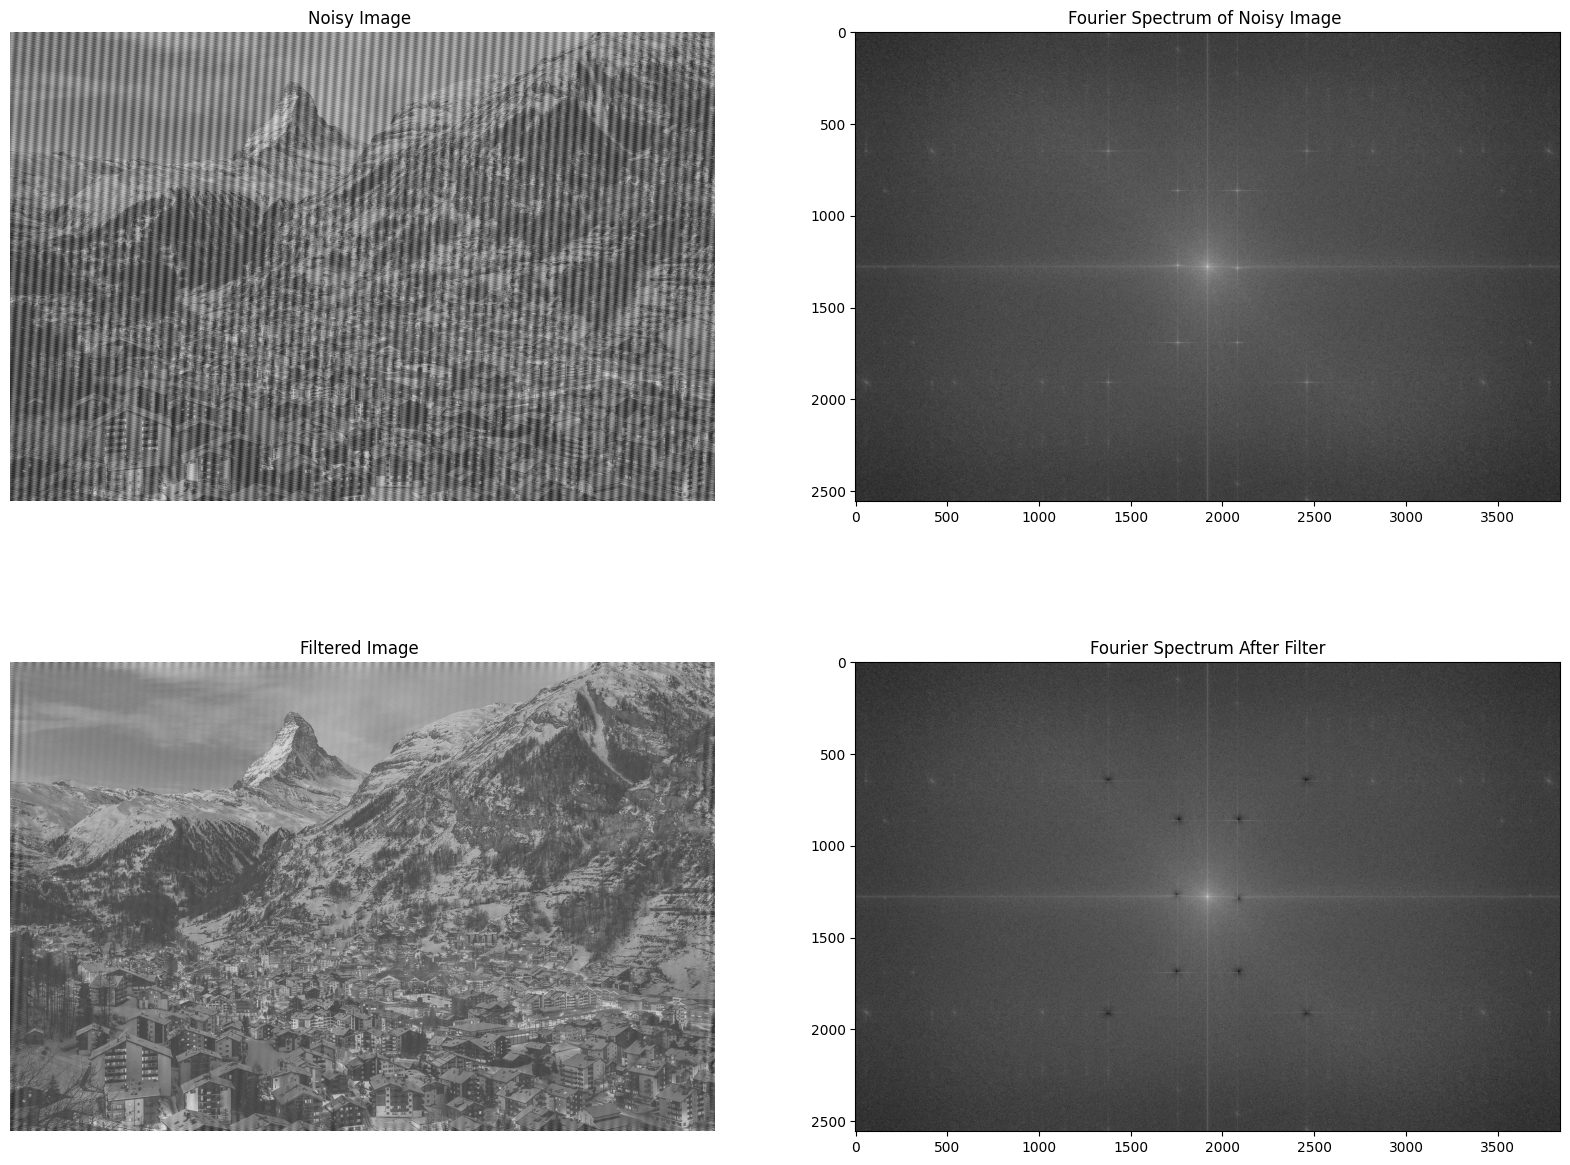

In [35]:
# Menampilkan perbedaan gambar sebelum dan sesudah dilakukan filter 
plt.figure(figsize=(20 , 15))
plt.subplot (2, 2, 1); plt.imshow ( swissImage , cmap ='gray')
plt.title ('Noisy Image ') ; plt . axis ("off")
plt. subplot (2, 2, 2); plt.imshow (s1Akhir, cmap ='gray')
plt. title ('Fourier Spectrum of Noisy Image ')
plt.subplot(2, 2 ,3); plt.imshow(FImage2, cmap ='gray')
plt.title('Filtered Image '); plt.axis ("off")
plt.subplot(2, 2, 4); plt.imshow(s2Akhir, cmap ='gray')
plt.title('Fourier Spectrum After Filter')
plt.show()

Dari hasil visualisasi sebelum dan setelah filtering di atas, kita dapat melihat perbedaan yang cukup besar. Pada domain spasial gambar original memiliki begitu banyak diagonal yang menutupi gambar sehingga isi gambar cukup sulit untuk terlihat. Namun, setelah dilakukan filtering, kualitas gambar menjadi jauh lebih baik dan sekarang jauh lebih mudah untuk kita melihat isi gambar. Dari sisi domain frekuensi setelah dilakukan filter terlihat bahwa ada beberapa titik hitam, yang merupakan hasil notch filtering, yang menutupi beberapa noise berupa titik putih yang cukup besar. Hal tersebut dilakukan untuk menjaga sinyal yang ingin kita dapatkan sehingga tidak terganggu oleh noise-noise tersebut.